# Customer Segmentation using K-Means
Project ini menggunakan [Mall Customer Segmentation Data](https://www.kaggle.com/vjchoudhary7/customer-segmentation-tutorial-in-python), dataset ini memiliki 5 kolom:
* CustomerID
* Gender
* Age
* Annual Income (k$)
* Spending Score (1-100)

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Data Preparation
### Import Data

In [2]:
df = pd.read_csv('data/Mall_Customers.csv')

df.sample(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
176,177,Male,58,88,15
59,60,Male,53,46,46
97,98,Female,27,60,50
190,191,Female,34,103,23
69,70,Female,32,48,47


### Ccheking for NaN Values

In [3]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

## Exploratory Data Analisis

In [4]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


### Customer Distribution by Gender

In [5]:
df_gender = df.groupby(['Gender'])['CustomerID'].count()

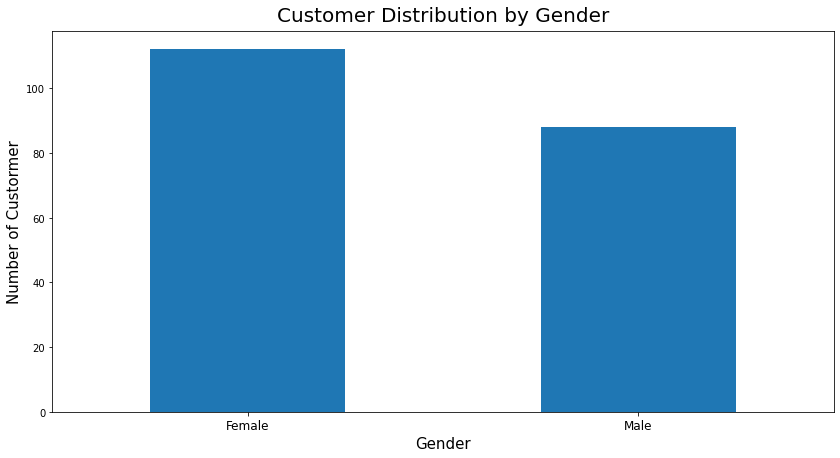

In [6]:
plt.figure(figsize=(14,7))
df_gender.plot(x='Gender', y='CustomerID', kind='bar')
plt.title('Customer Distribution by Gender', loc='center', fontsize=20, pad=10)
plt.ylabel('Number of Custormer', fontsize=15)
plt.xlabel('Gender', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.savefig('images/customer_by_gender.png')
plt.show()

### Customer Distribution by Age
Customer akan dikategorikan kedalam 5 kategori umur:
* *17 - 25* tahun
* *26 - 35* tahun
* *36 - 45* tahun
* *46 - 55* tahun
* *>56* tahun

In [7]:
def func(row):
    if (row['Age'] >= 17 and row['Age'] <= 25):
        val = '17 - 25'
    elif (row['Age'] > 25 and row['Age'] <= 35):
        val = '26 - 35'
    elif (row['Age'] > 35 and row['Age'] <= 45):
        val = '36 - 45'
    elif (row['Age'] > 45 and row['Age'] <= 55):
        val = '46 - 55'
    else:
        val = '>56'
    return val
        
df['Age_Group'] = df.apply(func, axis=1)
df_age = df.groupby(['Age_Group'])['CustomerID'].count()

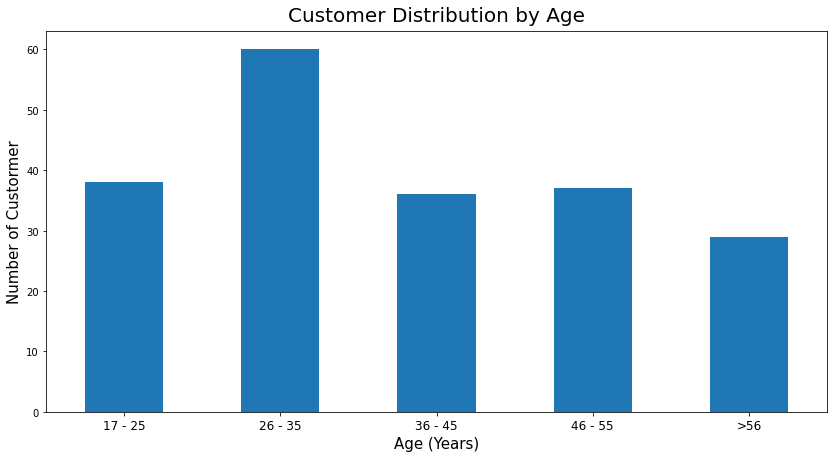

In [8]:
plt.figure(figsize=(14,7))
df_age.plot(x='Age_Group', y='CustomerID', kind='bar')
plt.title('Customer Distribution by Age', loc='center', fontsize=20, pad=10)
plt.ylabel('Number of Custormer', fontsize=15)
plt.xlabel('Age (Years)', fontsize=15)
plt.xticks(rotation=0, fontsize=12)
plt.savefig('images/customer_by_age.png')
plt.show()

### Plot Anual Income vs Spending Score

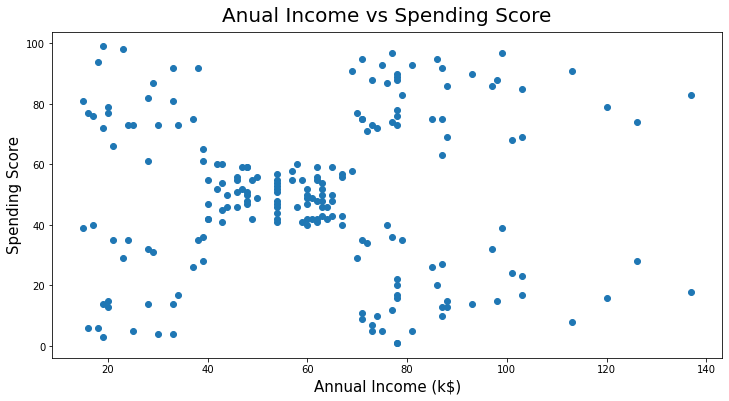

In [9]:
plt.figure(figsize=(12,6))
plt.scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'])
plt.title('Anual Income vs Spending Score', loc='center', fontsize=20, pad=10)
plt.ylabel('Spending Score', fontsize=15)
plt.xlabel('Annual Income (k$)', fontsize=15)
plt.savefig('images/income_vs_spendingscore.png')
plt.show()

## K-Means Clustering using Annual Income (k$) & Spending Score (1-100)

### Selecting Feature

In [10]:
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

### Measuring Cluster Criteria

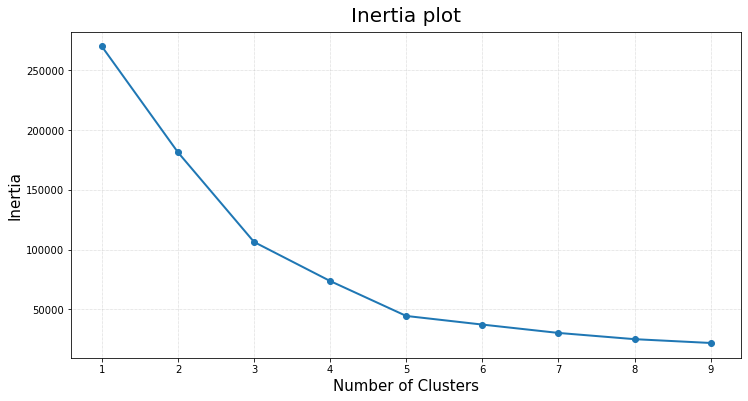

In [11]:
#Elbow Method - Inertia plot
inertia = []
#looping the inertia calculation for each k
for k in range(1, 10):
    #Assign KMeans as cluster_model
    cluster_model = KMeans(n_clusters = k, random_state = 24)
    #Fit cluster_model to X
    cluster_model.fit(X)
    #Get the inertia value
    inertia_value = cluster_model.inertia_
    #Append the inertia_value to inertia list
    inertia.append(inertia_value)
##Inertia plot
plt.figure(figsize=(12,6))
plt.plot(range(1, 10), inertia, marker='o', linewidth=2)
plt.title('Inertia plot', fontsize = 20, pad=10)
plt.xlabel('Number of Clusters', fontsize=15)
plt.ylabel('Inertia', fontsize=15)
plt.grid(color='darkgray', linestyle=':', linewidth=0.5)
plt.savefig('images/inertia.png')
plt.show()

Berdasarkan plot inertia tersebut dan dengan menggunakan Elbow method, maka dapat disimpulkan bahwa jumlah cluster yang optimal adalah $K=3$

### Training the K-Means Model using $K=3$

In [12]:
K = 5
cluster_model = KMeans(n_clusters = K, random_state = 24)
labels = cluster_model.fit_predict(X)

In [13]:
#Membagi X ke xs dan ys
X = X.values
xs = X[:,0]
ys = X[:,1]

# Centroid
centroids = cluster_model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]

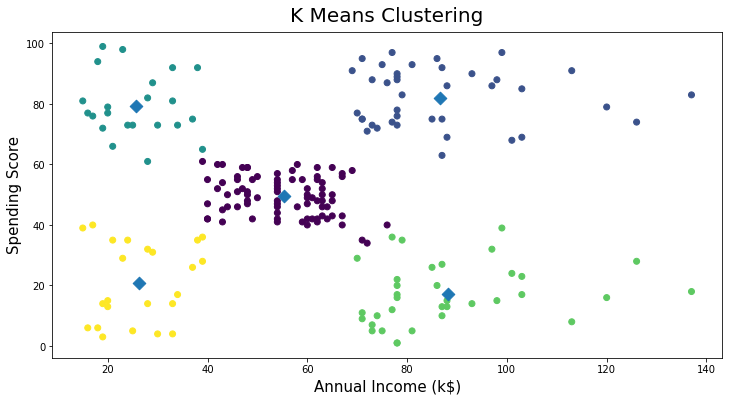

In [14]:
plt.figure(figsize=(12,6))
plt.scatter(xs,ys,c=labels)
plt.scatter(centroids_x,centroids_y,marker='D', s=80)
plt.title('K Means Clustering', loc='center', fontsize=20, pad=10)
plt.ylabel('Spending Score', fontsize=15)
plt.xlabel('Annual Income (k$)', fontsize=15)
plt.savefig('images/km_clustering.png')
plt.show()